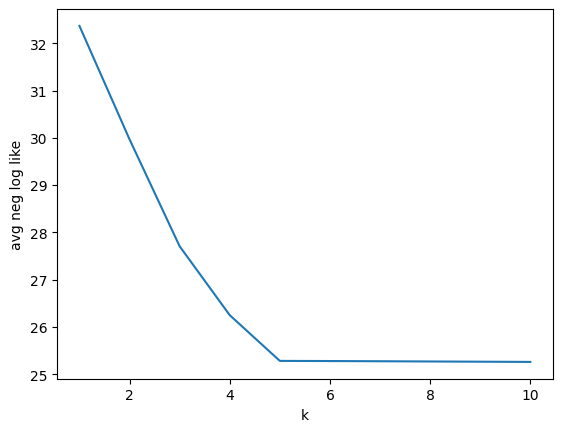

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Generate synthetic data for testing
dataset = np.loadtxt('./gmm_dataset.csv', delimiter=',')

# Number of components to try
n_components_range = range(1, 11)

# Fit models with different components
models = [GaussianMixture(n, covariance_type='diag', random_state=42069, max_iter=500).fit(dataset) for n in n_components_range]

#neg log like
plotYAxis = [(-1 * model.score(dataset)) for model in models]

plt.figure()
plt.plot(n_components_range, plotYAxis)
plt.xlabel("k")
plt.ylabel("avg neg log like")
plt.show()




In [ ]:
chosen_k = 7

model = models[chosen_k - 1]

weights = model.weights_
means = model.means_
covar = model.covariances_.diagonal()

ind = np.argsort(weights)
weights = weights[ind]
means = means[ind]
covar = covar[ind]

print(f"Mixing Weight: {weights}")
print(f"Mean Vector: {means}")
print(f"Diagonal of Covariance Matrix: {covar}")


Time complexity is sklearns gmm.fit complexity. In the order of O(ndk^3).



Choose: **k = 7**, because after 6 components, the data did not fit much better with the increase of a component. So I feel 6 or 7 is a good value for k as it lowers the number of components and maintains highest accuracy.




---



Mixing Weight: [0.09963714 0.09999841 0.13632428 0.13996228 0.16003862 0.16404145
0.19999782]





Mean Vector: [[ 1.68929215  0.40327977  0.99225136  2.35085432  1.88580664 -0.96234278
   0.8856494  -0.19112984 -0.08578846  0.34060756  0.03534855  1.39639467
   0.73757474  0.10971527  0.42392643  0.32850317  1.46423062 -0.2103343
   0.29002674 -0.8467717 ]
 [-2.56304811  0.60297414  0.9073486  -0.70992468  2.30623868 -1.43950455
   0.06350285 -0.18417546  1.51899014  1.4700994   0.13308299  0.40691059
  -0.85397168 -1.97684461 -0.32116887  0.18215541  1.22248979  1.21355931
  -0.44231748 -0.3195732 ]
 [-1.11304729  0.9183255   0.4183382  -0.52648805  1.49726455  1.93643739
   1.08713103 -0.17231561 -1.03341639  1.09795125 -0.33181684  1.29712436
   0.21235616  0.96817157  0.30825576  0.72630166 -0.0090716   1.77643101
   0.08906354  0.29161937]
 [-0.65712372 -1.3146368  -0.86240292 -1.71904069  0.18987681 -0.31974112
  -1.55664286  0.42633786 -0.94310583  0.07936145  0.78373154  0.08765006
   1.17959912 -1.25474416  0.48764932 -0.71331486 -0.82522672 -0.58944347
  -0.3350353   0.05299547]
 [-0.67038731  0.40255314 -0.81721656 -1.71640667  0.18854128 -0.41536877
  -1.72129635  0.52647253 -0.94703938 -0.00701858  0.71802687  0.09512176
   1.12159531 -1.17183068  0.39172532 -0.69342078 -0.95282409 -0.55412142
  -0.3061994   0.05759537]
 [-1.18131535  0.94941053  0.5125065  -2.39445307  1.51623583  1.91615475
   1.296197   -0.18649476 -1.07568893  1.08159079 -0.33265438  1.16756148
   0.21132924  0.97484665  0.39110613  0.71917072  0.02681937  1.83143241
   0.09509687  0.48962134]
 [-1.04355061 -1.39364161 -1.70804337  1.91672509 -0.54122952 -0.44188947
  -1.27505932  0.76667667 -1.57565581 -0.22052918 -0.89479387  0.38804281
  -0.53755216 -1.16554304 -0.04041252  0.44094584  0.04643439  0.30260094
  -0.65284335 -0.34928293]]





Diagonal of Covariance Matrix: [1.7215047  0.4073267  1.36902361 0.08746832 1.03712914 1.59087283
 2.49076425]


In [3]:
#PART B)

import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data.astype('float64'), mnist.target.astype('int')



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)



# Number of components for each class
n_components_per_class = 5

# Initialize GMM models for each class
gmm_models = []

for digit in range(10):
    # Select only the training data for the current digit
    digit_indices = np.where(y_train == digit)
    digit_data = X_train[digit_indices]

    # Fit GMM for the current digit
    gmm = GaussianMixture(n_components=n_components_per_class, max_iter= 500, covariance_type='diag', random_state=42069)
    gmm.fit(digit_data)

    # Append the trained model to the list
    gmm_models.append(gmm)

# Predict labels for the test set
y_pred = []

for sample in X_test:
    likelihoods = [gmm.score_samples(sample.reshape(1, -1))[0] for gmm in gmm_models]
    predicted_digit = np.argmax(likelihoods)
    y_pred.append(predicted_digit)

# Evaluate accuracy
error = mean_squared_error(y_test, y_pred)
print(f"Error: {error:.2f}")


Error: 4.52



Error rate - using Mean Squared Error: 4.52